# Import Dataset

In [1]:
library(dplyr)
library(ggplot2)
library(plyr)
library(zoo)
library(tidyr)
library(ggplot2)
library(gridExtra)
library(tidyverse)
library(leaps)
library(car)

acs_2018 = read.table("usa_00007.csv", sep = ",", header = TRUE)
acs_2018_1 = read.table("cleaned_acs_2018.csv", sep = ",", header = TRUE)

# Filter state to Minnesota
minn = filter(acs_2018, STATEFIP == '27')
minn1 = filter(acs_2018_1, STATEFIP == 'Minnesota')
#head(minn)
minn = data.frame(minn)
head(minn)

summary(minn)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘gridExtra’

The follow

YEAR,STATEFIP,FAMSIZE,SEX,AGE,MARRNO,RACE,RACED,YRSUSA1,EDUC,EDUCD,CLASSWKR,CLASSWKRD,UHRSWORK,INCWAGE,POVERTY,OCCSCORE,DIFFSENS
2018,27,3,1,37,1,1,100,0,10,101,2,22,40,39815,501,42,1
2018,27,3,2,37,1,1,100,0,10,101,2,22,50,106173,501,42,1
2018,27,2,2,25,0,1,100,0,7,71,2,22,36,16988,105,16,1
2018,27,5,2,43,1,1,100,0,8,81,2,22,32,45654,363,25,1
2018,27,5,1,42,1,1,100,0,8,81,2,22,50,63704,363,30,1
2018,27,5,2,18,0,1,100,0,6,61,0,0,0,0,363,0,1


      YEAR         STATEFIP     FAMSIZE            SEX             AGE       
 Min.   :2018   Min.   :27   Min.   : 1.000   Min.   :1.000   Min.   :18.00  
 1st Qu.:2018   1st Qu.:27   1st Qu.: 2.000   1st Qu.:1.000   1st Qu.:35.00  
 Median :2018   Median :27   Median : 2.000   Median :2.000   Median :52.00  
 Mean   :2018   Mean   :27   Mean   : 2.566   Mean   :1.502   Mean   :50.77  
 3rd Qu.:2018   3rd Qu.:27   3rd Qu.: 3.000   3rd Qu.:2.000   3rd Qu.:64.00  
 Max.   :2018   Max.   :27   Max.   :17.000   Max.   :2.000   Max.   :95.00  
     MARRNO            RACE           RACED          YRSUSA1      
 Min.   :0.0000   Min.   :1.000   Min.   :100.0   Min.   : 0.000  
 1st Qu.:1.0000   1st Qu.:1.000   1st Qu.:100.0   1st Qu.: 0.000  
 Median :1.0000   Median :1.000   Median :100.0   Median : 0.000  
 Mean   :0.9413   Mean   :1.306   Mean   :131.8   Mean   : 1.261  
 3rd Qu.:1.0000   3rd Qu.:1.000   3rd Qu.:100.0   3rd Qu.: 0.000  
 Max.   :3.0000   Max.   :9.000   Max.   :990.0   Ma

# Cleaning Dataset

In [2]:
# Utilized R Studio in order to use ipumsr package to relabel values to the actual labels
# i.e, SEX values 1 will be changed to Male
minn$MARST = minn1$MARST
minn$CLASSWKR = minn1$CLASSWKR
minn$DIFFSENS = minn1$DIFFSENS
minn$SEX = minn1$SEX

# Grouping Chinese, Japanese, Other Asian, and Pacific Islander to Asian American
minn$RACE[minn$RACE == 1] = "White"
minn$RACE[minn$RACE == 2] = "Black/African American"
minn$RACE[minn$RACE == 3] = "American Indian or Alaska Native"
minn$RACE[minn$RACE == 4] = "Asian American or Pacific Islander"
minn$RACE[minn$RACE == 5] = "Asian American or Pacific Islander"
minn$RACE[minn$RACE == 6] = "Asian American or Pacific Islander"
minn$RACE[minn$RACE == 7] = "Other Race"
minn$RACE[minn$RACE == 8] = "Other Race"
minn$RACE[minn$RACE == 9] = "Other Race"

# Grouping Education Levels
minn$EDUC[minn$EDUC == 0] = "High School or Less"
minn$EDUC[minn$EDUC == 1] = "High School or Less"
minn$EDUC[minn$EDUC == 2] = "High School or Less"
minn$EDUC[minn$EDUC == 3] = "High School or Less"
minn$EDUC[minn$EDUC == 4] = "High School or Less"
minn$EDUC[minn$EDUC == 5] = "High School or Less"
minn$EDUC[minn$EDUC == 6] = "High School or Less"
minn$EDUC[minn$EDUC == 7] = "College or More"
minn$EDUC[minn$EDUC == 8] = "College or More"
minn$EDUC[minn$EDUC == 9] = "College or More"
minn$EDUC[minn$EDUC == 10] = "College or More"
minn$EDUC[minn$EDUC == 11] = "College or More"

# Changing 0 to NA, this is because of the IPUMS package used in R Studio changed the NA values to 0
minn$YRSUSA1[minn$YRSUSA1 == 0] = NA

# FAMSIZE, AGE, MARRNO, YRSUSA1, UHRSWORK, INCWAGE, OCCSCORE are continuous

In [3]:
mn = select(minn, -c(YEAR, STATEFIP, RACED, CLASSWKRD, EDUCD, POVERTY))
head(mn)

FAMSIZE,SEX,AGE,MARRNO,RACE,YRSUSA1,EDUC,CLASSWKR,UHRSWORK,INCWAGE,OCCSCORE,DIFFSENS
3,Male,37,1,White,NA,College or More,Works for wages,40,39815,42,No vision or hearing difficulty
3,Female,37,1,White,NA,College or More,Works for wages,50,106173,42,No vision or hearing difficulty
2,Female,25,0,White,NA,College or More,Works for wages,36,16988,16,No vision or hearing difficulty
5,Female,43,1,White,NA,College or More,Works for wages,32,45654,25,No vision or hearing difficulty
5,Male,42,1,White,NA,College or More,Works for wages,50,63704,30,No vision or hearing difficulty
5,Female,18,0,White,NA,High School or Less,N/A,0,0,0,No vision or hearing difficulty


# Exploratory Analysis

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

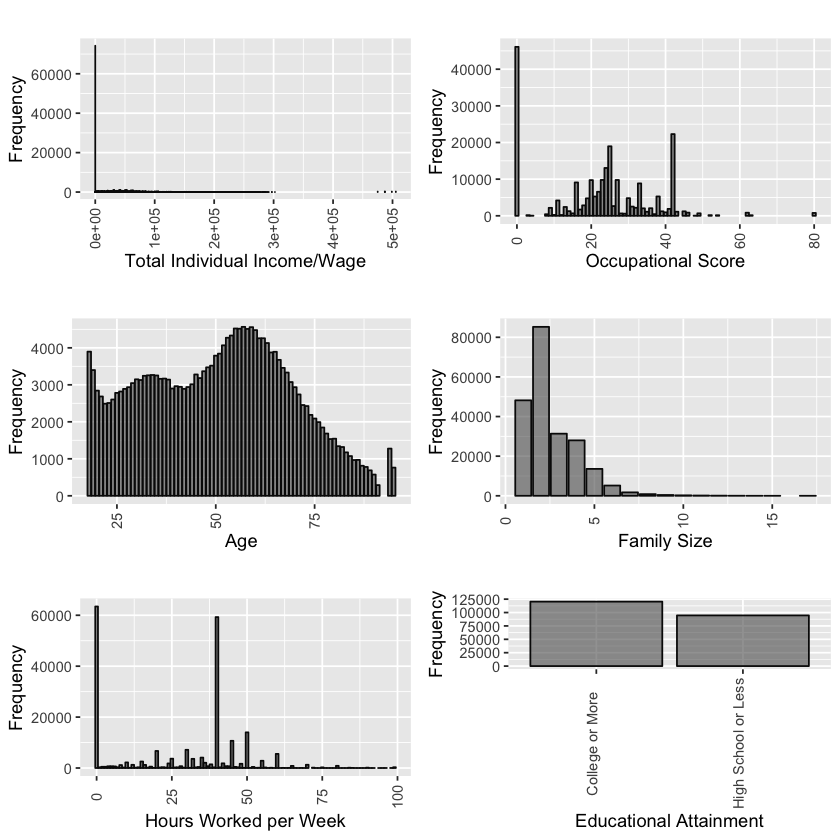

In [4]:
# Exploratory Data Analysis

# Histograms for numeric values
age_hist <- ggplot(mn, aes(x = mn$AGE)) +
    geom_histogram(color="grey3", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Age") + 
    ylab("Frequency") + labs(fill = "") + ggtitle("") + theme(legend.position = "none")

famsize_hist <- ggplot(mn, aes(x = mn$FAMSIZE)) +
    geom_histogram(color="grey3", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Family Size") + 
    ylab("Frequency") + labs(fill = "") + ggtitle("") + theme(legend.position = "none")

hours_hist <- ggplot(mn, aes(x = mn$UHRSWORK)) +
    geom_histogram(color="grey3", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Hours Worked per Week") + 
    ylab("Frequency") + labs(fill = "") + ggtitle("") + theme(legend.position = "none")

edu_hist <- ggplot(mn, aes(x = mn$EDUC)) +
    geom_histogram(color="grey3", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.1)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Educational Attainment") + 
    ylab("Frequency") + labs(fill = "") + ggtitle("") + theme(legend.position = "none")

inc_hist <- ggplot(mn, aes(x = mn$INCWAGE)) +
    geom_histogram(color="grey3", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Total Individual Income/Wage") + 
    ylab("Frequency") + labs(fill = "") + ggtitle("") + theme(legend.position = "none")

occ_hist <- ggplot(mn, aes(x = mn$OCCSCORE)) +
    geom_histogram(color="grey3", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Occupational Score") + 
    ylab("Frequency") + labs(fill = "") + ggtitle("") + theme(legend.position = "none")

grid.arrange(inc_hist, occ_hist, age_hist, famsize_hist, hours_hist, edu_hist, nrow=3)

# SLR with Numeric Predictors and Income as Response

In [5]:
# FAMSIZE, AGE, MARRNO, UHRSWORK, INCWAGE, OCCSCORE are continuous
lm_age = lm(INCWAGE ~ AGE, data = mn)
lm_size = lm(INCWAGE ~ FAMSIZE, data = mn)
lm_marrno = lm(INCWAGE ~ MARRNO, data = mn)
lm_hours = lm(INCWAGE ~ UHRSWORK, data = mn)
lm_occ = lm(INCWAGE ~ OCCSCORE, data = mn)

summary(lm_age); summary(lm_size); summary(lm_marrno); summary(lm_occ)
#plot(lm_age); plot(lm_size); plot(lm_marrno); plot(lm_occ)


Call:
lm(formula = INCWAGE ~ AGE, data = mn)

Residuals:
   Min     1Q Median     3Q    Max 
-45331 -26279 -16550  13332 484975 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 52627.877    322.839  163.02   <2e-16 ***
AGE          -405.374      5.973  -67.87   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 51360 on 215020 degrees of freedom
Multiple R-squared:  0.02097,	Adjusted R-squared:  0.02097 
F-statistic:  4606 on 1 and 215020 DF,  p-value: < 2.2e-16



Call:
lm(formula = INCWAGE ~ FAMSIZE, data = mn)

Residuals:
   Min     1Q Median     3Q    Max 
-99438 -29406 -16665  14703 480841 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20068.00     223.57   89.76   <2e-16 ***
FAMSIZE      4668.83      75.64   61.72   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 51460 on 215020 degrees of freedom
Multiple R-squared:  0.01741,	Adjusted R-squared:  0.0174 
F-statistic:  3809 on 1 and 215020 DF,  p-value: < 2.2e-16



Call:
lm(formula = INCWAGE ~ MARRNO, data = mn)

Residuals:
   Min     1Q Median     3Q    Max 
-40265 -32282 -15539  15414 477288 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  28290.0      192.3  147.09   <2e-16 ***
MARRNO        3991.5      166.3   24.01   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 51840 on 215020 degrees of freedom
Multiple R-squared:  0.002673,	Adjusted R-squared:  0.002669 
F-statistic: 576.4 on 1 and 215020 DF,  p-value: < 2.2e-16



Call:
lm(formula = INCWAGE ~ OCCSCORE, data = mn)

Residuals:
    Min      1Q  Median      3Q     Max 
-132024  -22458    1896    5860  495480 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5357.126    175.920  -30.45   <2e-16 ***
OCCSCORE     1717.259      6.707  256.03   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 45440 on 215020 degrees of freedom
Multiple R-squared:  0.2336,	Adjusted R-squared:  0.2336 
F-statistic: 6.555e+04 on 1 and 215020 DF,  p-value: < 2.2e-16


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


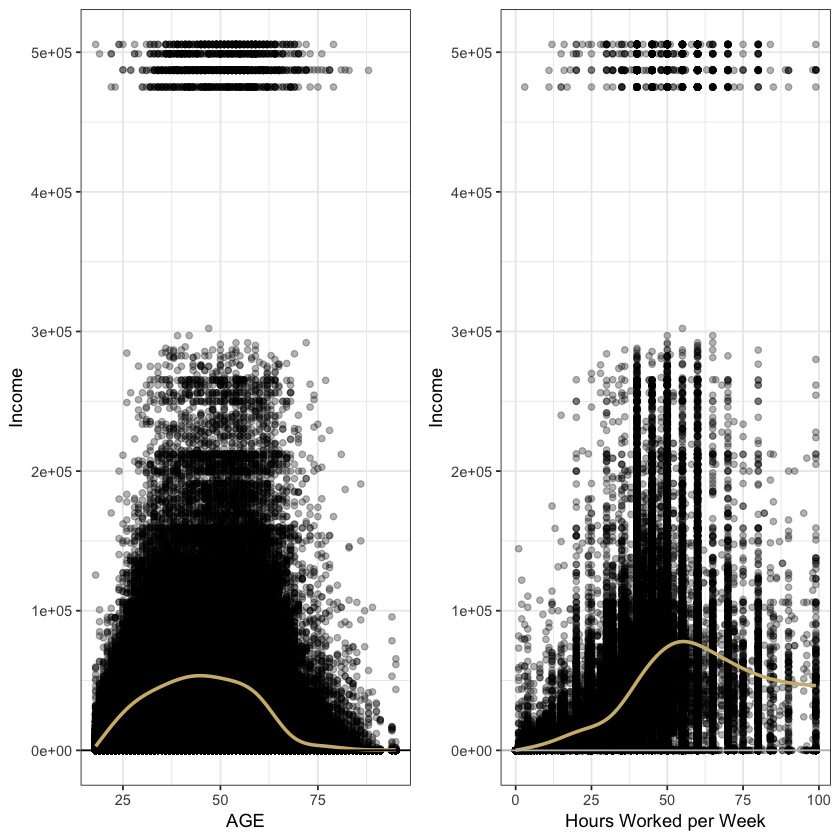

In [6]:
p1 = ggplot(mn, aes(y = INCWAGE, x = AGE)) + 
    geom_point(alpha = 0.3) + 
    geom_smooth(se = F, col = "#CFB87C") + 
    geom_abline(intercept = 0, slope = 1) + 
    xlab("AGE") + 
    ylab("Income") + 
    theme_bw()

p2 = ggplot(mn, aes(y = INCWAGE, x = UHRSWORK)) + 
    geom_point(alpha = 0.3) + 
    geom_smooth(se = F, col = "#CFB87C") + 
    geom_abline(intercept = 0, slope = 1, col = 'grey') + 
    xlab("Hours Worked per Week") + 
    ylab("Income") + 
    theme_bw()
grid.arrange(p1, p2, nrow=1)

# AIC and BIC Graphs

(Intercept),FAMSIZE,SEXMale,AGE,MARRNO,RACEAsian American or Pacific Islander,RACEBlack/African American,RACEOther Race,RACEWhite,YRSUSA1,EDUCHigh School or Less,CLASSWKRSelf-employed,CLASSWKRWorks for wages,UHRSWORK,OCCSCORE,DIFFSENSNo vision or hearing difficulty
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE
TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE
TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE
TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE
TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE


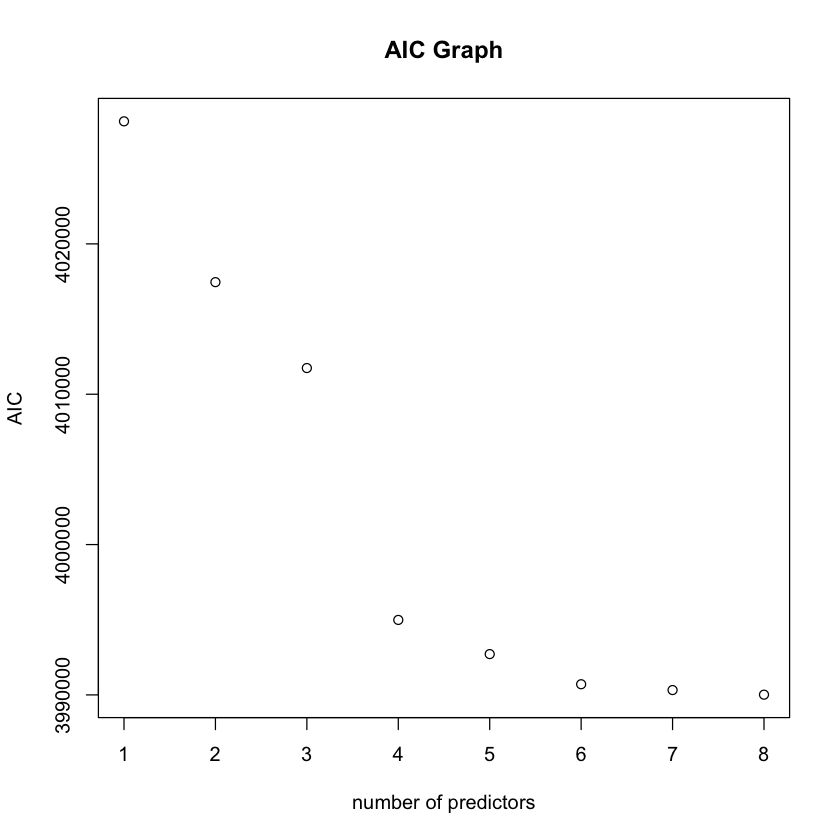

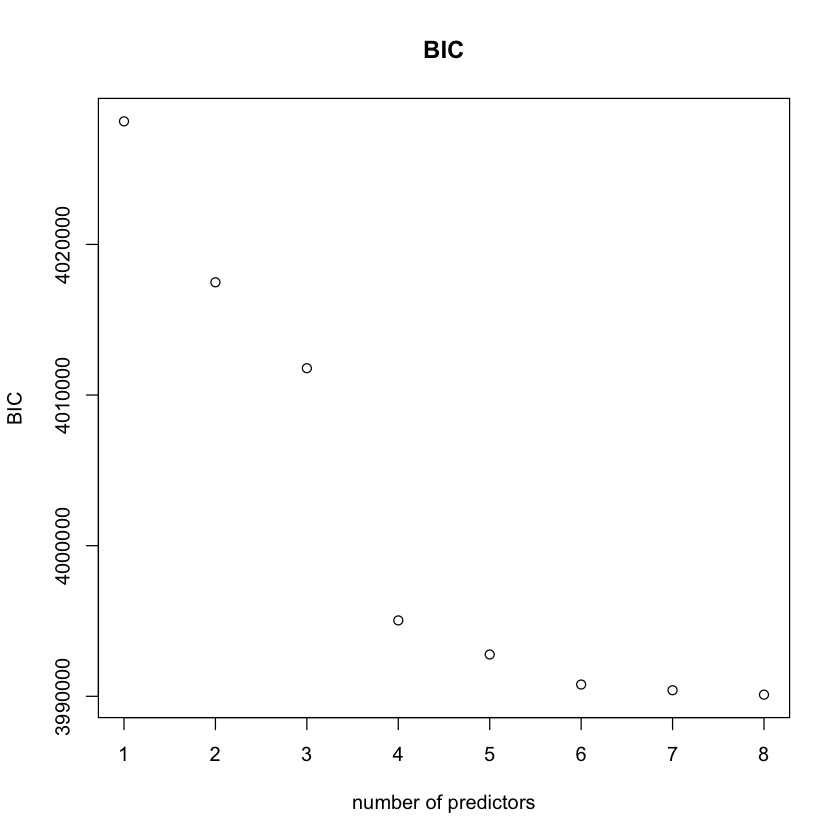

In [7]:
# corr = cor(model.matrix(lmod_co)[,-1])

n = dim(mn)[1]; 
regmn = regsubsets(INCWAGE ~ ., data = mn)
rs = summary(regmn)
rs$which

AIC = 2*(2:9) + n*log(rs$rss/n)
plot(AIC ~ I(1:8), xlab = 'number of predictors', ylab = 'AIC', main = "AIC Graph")

# Best predictors in terms of AIC
# 8 predictors - SEX, AGE, MARRNO, EDUC, CLASSWKR, UHRSWORK, OCCSCORE, DIFFSENS
# 7 predictors - SEX, AGE, EDUC, CLASSWKR, UHRSWORK, OCCSCORE, DIFFSENS
# 6 predictors - AGE, EDUC, CLASSWKR, UHRSWORK, OCCSCORE, DIFFSENS

BIC = log(n)*(2:9) + n*log(rs$rss/n) 
plot(BIC ~ I(1:8), xlab = "number of predictors", ylab = "BIC", main = "BIC")

# Best predictors in terms of BIC
# 8 predictors - SEX, AGE, MARRNO, EDUC, CLASSWKR, UHRSWORK, OCCSCORE, DIFFSENS
# 7 predictors - SEX, AGE, EDUC, CLASSWKR, UHRSWORK, OCCSCORE, DIFFSENS
# 6 predictors - AGE, EDUC, CLASSWKR, UHRSWORK, OCCSCORE, DIFFSENS

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
215014,3.664330e+14,NA,NA,NA,NA
215013,3.654702e+14,1,962810687844,566.4396,4.854117e-125


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
215013,3.654702e+14,NA,NA,NA,NA
215008,3.645137e+14,5,956495402227,112.8375,1.589352e-119


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


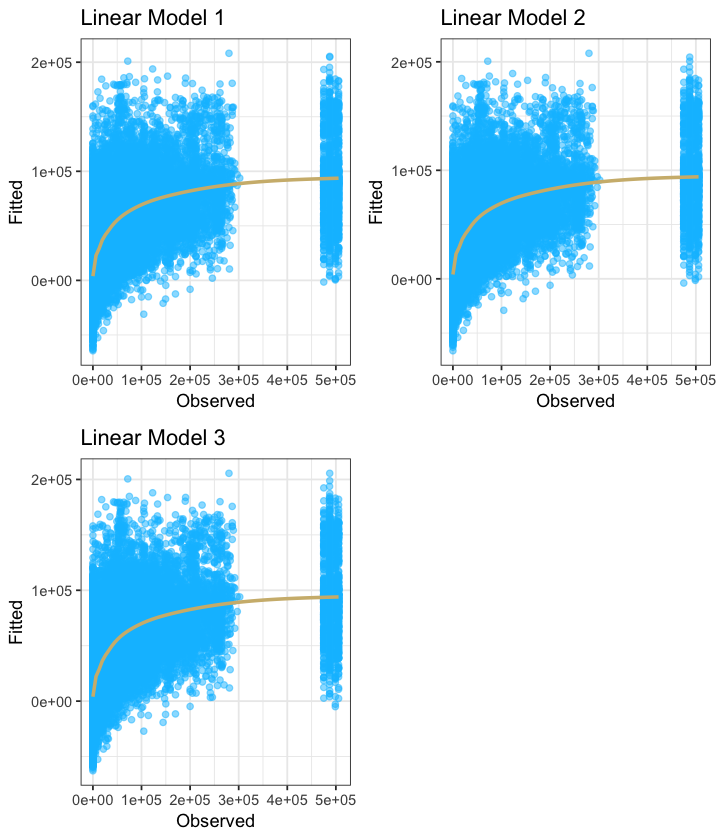

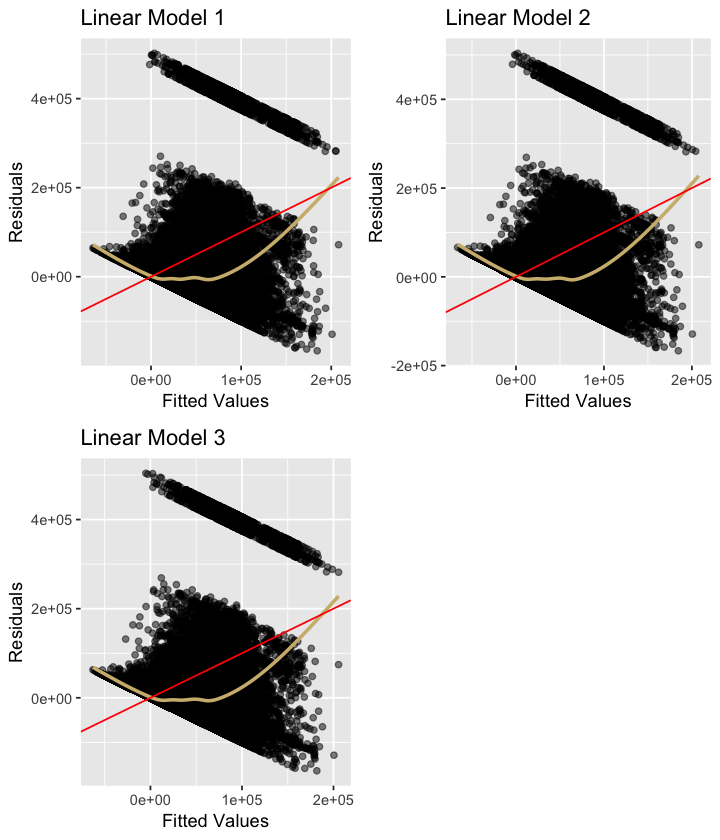

In [8]:
lm_1 = lm(INCWAGE ~ AGE + EDUC + CLASSWKR + UHRSWORK + OCCSCORE + DIFFSENS , mn)
lm_2 = lm(INCWAGE ~ SEX+ AGE + EDUC + CLASSWKR + UHRSWORK + OCCSCORE + DIFFSENS, mn)
lm_3 = lm(INCWAGE ~ SEX+ AGE + MARRNO + EDUC + CLASSWKR + UHRSWORK + OCCSCORE + DIFFSENS + RACE, mn)

anova(lm_1, lm_2)
anova(lm_2, lm_3)

lm_diag1 = data.frame(yhat = fitted(lm_1), r = resid(lm_1), y = mn$INCWAGE)
lm_diag2 = data.frame(yhat = fitted(lm_2), r = resid(lm_2), y = mn$INCWAGE)
lm_diag3 = data.frame(yhat = fitted(lm_3), r = resid(lm_3), y = mn$INCWAGE)

options(repr.plot.width = 6, repr.plot.width = 6)
lm1 = ggplot(lm_diag1, aes(x = y, y = yhat)) + 
    geom_point(alpha =0.5, col = 'deepskyblue') + 
    geom_smooth(se = F, col = "#CFB87C") + 
    xlab("Observed") + 
    ylab("Fitted") + 
    ggtitle("Linear Model 1") +
    theme_bw()

lm2 = ggplot(lm_diag2, aes(x = y, y = yhat)) + 
    geom_point(alpha =0.5, col = 'deepskyblue') + 
    geom_smooth(se = F, col = "#CFB87C") + 
    xlab("Observed") + 
    ylab("Fitted") + 
    ggtitle("Linear Model 2") +
    theme_bw()

lm3 = ggplot(lm_diag3, aes(x = y, y = yhat)) + 
    geom_point(alpha =0.5, col = 'deepskyblue') + 
    geom_smooth(se = F, col = "#CFB87C") + 
    xlab("Observed") + 
    ylab("Fitted") + 
    ggtitle("Linear Model 3") +
    theme_bw()


res1 = ggplot(lm_diag1, aes(x = yhat, y = r)) + 
    geom_point(alpha = 0.5) + 
    geom_smooth(se = F, col = "#CFB87C") + 
    geom_abline(intercept = 0, col = 'red') + 
    xlab("Fitted Values") + 
    ggtitle("Linear Model 1") +
    ylab("Residuals")
res2 = ggplot(lm_diag2, aes(x = yhat, y = r)) + 
    geom_point(alpha = 0.5) + 
    geom_smooth(se = F, col = "#CFB87C") + 
    geom_abline(intercept = 0, col = 'red') + 
    xlab("Fitted Values") + 
    ggtitle("Linear Model 2") +
    ylab("Residuals")
res3 = ggplot(lm_diag3, aes(x = yhat, y = r)) + 
    geom_point(alpha = 0.5) + 
    geom_smooth(se = F, col = "#CFB87C") + 
    geom_abline(intercept = 0, col = 'red') + 
    xlab("Fitted Values") +
    ggtitle("Linear Model 3") +
    ylab("Residuals")

grid.arrange(lm1, lm2, lm3, nrow=2)
grid.arrange(res1, res2, res3, nrow = 2)

# MSE and MSPE

In [36]:
set.seed(00000)
df_mn = data.frame(mn)
n = nrow(df_mn)
split = floor(0.80 * n)

sample_set = sample.int(n, size = split, replace = FALSE)

train = df_mn[sample_set, ]
test = df_mn[-sample_set, ]
head(train)

,FAMSIZE,SEX,AGE,MARRNO,RACE,YRSUSA1,EDUC,CLASSWKR,UHRSWORK,INCWAGE,OCCSCORE,DIFFSENS,INCTHRES
82937,3,Male,55,1,White,NA,College or More,Works for wages,40,74194,30,No vision or hearing difficulty,1
13218,2,Female,63,1,White,NA,College or More,Works for wages,7,212,27,No vision or hearing difficulty,0
61911,1,Female,31,0,Other Race,NA,College or More,Works for wages,40,56175,33,No vision or hearing difficulty,1
172302,1,Male,20,0,White,NA,College or More,Works for wages,20,9000,41,No vision or hearing difficulty,0
79035,2,Male,51,0,White,NA,College or More,Self-employed,50,0,24,No vision or hearing difficulty,0
176097,2,Male,53,1,White,NA,College or More,Self-employed,55,0,24,No vision or hearing difficulty,0


In [65]:
mlr_inc = lm(INCWAGE ~ AGE + FAMSIZE + MARRNO + UHRSWORK + OCCSCORE, data = train)
summary(mlr_inc)


Call:
lm(formula = INCWAGE ~ AGE + FAMSIZE + MARRNO + UHRSWORK + OCCSCORE, 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-137377  -18216   -2310    9742  488949 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -37485.748    523.202  -71.65   <2e-16 ***
AGE            315.442      7.517   41.97   <2e-16 ***
FAMSIZE       1828.201     77.076   23.72   <2e-16 ***
MARRNO        2156.444    180.025   11.98   <2e-16 ***
UHRSWORK       890.835      6.653  133.90   <2e-16 ***
OCCSCORE      1041.662      9.187  113.38   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 43200 on 172011 degrees of freedom
Multiple R-squared:  0.3117,	Adjusted R-squared:  0.3117 
F-statistic: 1.558e+04 on 5 and 172011 DF,  p-value: < 2.2e-16


In [66]:
# MSPE
k = nrow(test) #number of rows

y = train$INCWAGE
y_star = test$INCWAGE

X = cbind(1, train$AGE, train$FAMSIZE, train$MARRNO, train$UHRSWORK, train$OCCSCORE) #train model
X_star = cbind(1, test$AGE, test$FAMSIZE, test$MARRNO, test$UHRSWORK, test$OCCSCORE) #test model

beta = solve(t(X)%*%X)%*%t(X)%*%y

y_hat_star = X_star%*%beta #i'th response value in test set

MSPE = (1/k)*sum((y_star - y_hat_star)^2)

MSPE

[1] 1789101585

In [54]:
# MSE
n = nrow(train) # number of rows
y = train$INCWAGE
X = cbind(1, train$AGE, train$FAMSIZE, train$MARRNO, train$UHRSWORK, train$OCCSCORE)
beta = solve(t(X)%*%X)%*%t(X)%*%y #beta hat
y_hat = X%*%beta # computing y_hat
MSE = (1/n)*sum((y - y_hat)^2); 

MSE

[1] 1866276235

In [56]:
abs(MSE - MSPE)

[1] 77174650

# Logistic Regression

In [ ]:
mn$EDUC = as_factor(mn$EDUC)
mn$CLASSWKR = as_factor(mn$CLASSWKR)
mn$DIFFSENS = as_factor(mn$DIFFSENS)
mn$SEX = as_factor(mn$SEX)
mn$RACE = as_factor(mn$RACE)

In [57]:
mn$INCTHRES = NA
mn$INCTHRES[mn$INCWAGE < 40000] =  0
mn$INCTHRES[mn$INCWAGE > 40000] =  1
head(mn)

FAMSIZE,SEX,AGE,MARRNO,RACE,YRSUSA1,EDUC,CLASSWKR,UHRSWORK,INCWAGE,OCCSCORE,DIFFSENS,INCTHRES
3,Male,37,1,White,NA,College or More,Works for wages,40,39815,42,No vision or hearing difficulty,0
3,Female,37,1,White,NA,College or More,Works for wages,50,106173,42,No vision or hearing difficulty,1
2,Female,25,0,White,NA,College or More,Works for wages,36,16988,16,No vision or hearing difficulty,0
5,Female,43,1,White,NA,College or More,Works for wages,32,45654,25,No vision or hearing difficulty,1
5,Male,42,1,White,NA,College or More,Works for wages,50,63704,30,No vision or hearing difficulty,1
5,Female,18,0,White,NA,High School or Less,N/A,0,0,0,No vision or hearing difficulty,0


In [58]:
glm_mn = glm(INCTHRES ~ SEX + AGE + MARRNO + EDUC + CLASSWKR + UHRSWORK + OCCSCORE + DIFFSENS + RACE, data = mn, 
             family = binomial("logit"))
summary(glm_mn)


Call:
glm(formula = INCTHRES ~ SEX + AGE + MARRNO + EDUC + CLASSWKR + 
    UHRSWORK + OCCSCORE + DIFFSENS + RACE, family = binomial("logit"), 
    data = mn)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.9273  -0.5278  -0.0002   0.5505   3.6111  

Coefficients:
                                          Estimate Std. Error z value Pr(>|z|)
(Intercept)                             -2.080e+01  2.934e+01  -0.709 0.478263
SEXMale                                  4.710e-01  1.345e-02  35.016  < 2e-16
AGE                                      1.323e-02  5.329e-04  24.833  < 2e-16
MARRNO                                   4.177e-01  1.120e-02  37.295  < 2e-16
EDUCHigh School or Less                 -9.347e-01  1.408e-02 -66.411  < 2e-16
CLASSWKRSelf-employed                    1.085e+01  2.934e+01   0.370 0.711550
CLASSWKRWorks for wages                  1.326e+01  2.934e+01   0.452 0.651256
UHRSWORK                                 9.161e-02  6.181e-04 148.207  < 2e-16
O

In [ ]:
plot(glm_mn)

In [60]:
vif(glm_mn)
kappa(glm_mn)

,GVIF,Df,GVIF^(1/(2*Df))
SEX,1.092749,1,1.045346
AGE,1.394770,1,1.181004
MARRNO,1.306001,1,1.142804
EDUC,1.079245,1,1.038867
CLASSWKR,1.185313,2,1.043418
UHRSWORK,1.167415,1,1.080470
OCCSCORE,1.040668,1,1.020131
DIFFSENS,1.022280,1,1.011079
RACE,1.022314,4,1.002762


[1] 797463.6